In [107]:
# Ismet Okan Celik CWID:10472265
# Homework-7
# I pledge my honor that I have abided by the Stevens Honor System.

In [108]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [109]:
data=pd.read_csv('EE627A_HW1_Data.csv')
data.head()

,Date,Mkt-RF,SMB,HML,RF,Mom,Food,Beer,Smoke,Games,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
0,192701,-0.10,-0.09,4.72,0.25,0.36,-0.70,0.57,-0.33,2.46,...,1.88,2.08,-1.45,-2.60,1.44,-17.93,-3.34,1.53,-2.48,-4.13
1,192702,4.32,0.31,3.40,0.26,-1.67,4.29,12.83,1.58,1.43,...,3.97,8.90,4.85,5.21,5.20,3.49,4.48,6.81,2.77,0.30
2,192703,0.33,-1.77,-2.42,0.30,2.97,1.98,-13.56,5.55,0.57,...,5.56,-7.80,4.30,-8.39,1.06,-20.47,3.05,-2.44,1.41,2.28
3,192704,0.42,0.30,1.03,0.25,4.53,2.60,2.85,4.09,-3.34,...,-2.08,3.44,3.10,4.43,0.77,-10.75,2.09,6.02,3.76,4.71
4,192705,5.36,0.67,3.41,0.30,3.41,6.14,11.62,11.87,-0.50,...,3.35,18.33,5.10,5.66,6.69,-4.01,0.49,4.69,10.25,1.40


In [110]:
new_df=data[['Mkt-RF','SMB','HML','Mom']]
new_df

,Mkt-RF,SMB,HML,Mom
0,-0.10,-0.09,4.72,0.36
1,4.32,0.31,3.40,-1.67
2,0.33,-1.77,-2.42,2.97
3,0.42,0.30,1.03,4.53
4,5.36,0.67,3.41,3.41
...,...,...,...,...
943,-0.89,-0.94,1.40,2.22
944,0.77,-0.77,1.15,3.48
945,-2.35,-0.99,-0.78,-1.42
946,3.73,1.01,-1.73,0.42


In [111]:
pca=PCA()
pca=pca.fit(new_df)

In [112]:
# Showing how many principal components account for 75% of the covariance matrix
#Eigen Values
eigen_values=pca.explained_variance_

#Proportion=Normalized Eigen Values
proportion=pca.explained_variance_ratio_

#Cumulative
cumulative_list=[]
cumulative=0
for i in proportion:
    cumulative=cumulative+i
    cumulative_list.append(cumulative)

#Eigen Vectors
eigenvectors=pca.components_

df=pd.DataFrame([eigen_values,proportion,cumulative_list,eigenvectors[0],eigenvectors[1],eigenvectors[2],eigenvectors[3]],
                columns=['lambda-1','lambda-2','lambda-3','lambda-4'],
                index=['Eigenvalue','Proportion','Cumulative','Eigenvector','','',''])
df

,lambda-1,lambda-2,lambda-3,lambda-4
Eigenvalue,39.329336,18.216929,9.633691,9.333731
Proportion,0.514017,0.238087,0.125908,0.121988
Cumulative,0.514017,0.752104,0.878012,1.000000
Eigenvector,0.770501,0.226868,0.272144,-0.529903
,-0.569918,-0.171661,0.403012,-0.695203
,-0.270020,0.875309,-0.349300,-0.197265
,-0.092792,0.391022,0.800942,0.443827


We can see percentage of eigenvalue summation at Cumulative row. As we can see, the first two principal components account for almost 75% of the covariance matrix.

In [113]:
pca=PCA(n_components=2)
pca_data=pca.fit_transform(new_df)

In [114]:
pca_dataframe=pd.DataFrame(data=pca_data,columns=['PCA-1','PCA-2'])
pca_dataframe

,PCA-1,PCA-2
0,0.737974,2.499510
1,4.950810,0.791094
2,-2.637999,-2.149148
3,-1.986791,-2.249906
4,3.144619,-3.391021
...,...,...
943,-1.952695,0.464580
944,-1.370808,-1.487375
945,-1.753398,2.957218
946,2.151428,-2.513241


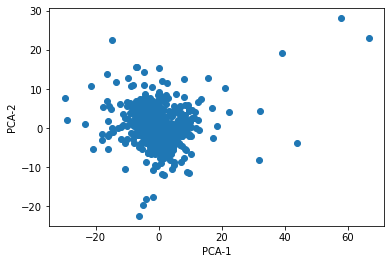

In [115]:
#Plotting PCA-1 and PCA-2
fig=plt.figure()
plt.scatter(pca_dataframe['PCA-1'],pca_dataframe['PCA-2'])
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.show()